# Distance-based classification
> For a high-level example using the `aeon` library, go to [this notebook](https://github.com/aeon-toolkit/aeon/blob/main/examples/classification/distance_based.ipynb)

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Creating the Dynamic Time Warping (DTW) distance

### Define Time Series
Define two time series for which we want to compute the DTW distance. Use 
Matplotlib to visualize the two time series.

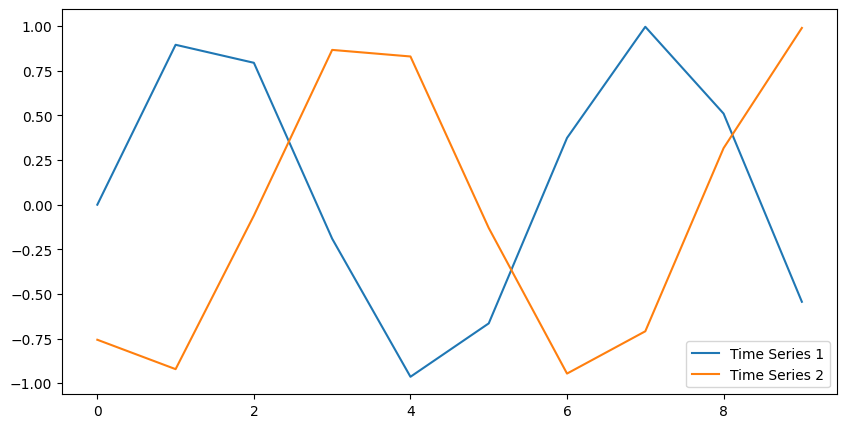

In [3]:
# Define Time Series (sinusoidal, one is a shifted version of the other)
time_series_1 = np.sin(np.linspace(0, 10, 10))
time_series_2 = np.sin(np.linspace(0, 10, 10) + 4)

def visualize_time_series(time_series_1, time_series_2):
    plt.figure(figsize=(10, 5))
    plt.plot(time_series_1, label='Time Series 1')
    plt.plot(time_series_2, label='Time Series 2')
    plt.legend()
    plt.show()

# Call the function with the defined time series
visualize_time_series(time_series_1, time_series_2)

#### Define point-wise distance function
Define a function to compute the distance between two points in the time series.

In [4]:
# Define Distance Function
def euclidean_distance(point1, point2):
    """
    Function to compute the Euclidean distance between two points
    """
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

print(f'The point-wise Euclidean distance between the time series is \
      {euclidean_distance(time_series_1, time_series_2)}')


The point-wise Euclidean distance between the time series is       4.035568406966147


### Initialize DTW Matrix
Initialize a matrix to store the DTW distances.

In [5]:
# Initialize DTW Matrix
def initialize_dtw_matrix(time_series_1, time_series_2):
    """
    Function to initialize the DTW matrix with zeros and set the first row and column to infinity
    """
    # Create a matrix filled with zeros, with dimensions (len(time_series_1)+1)x(len(time_series_2)+1)
    dtw_matrix = np.zeros((len(time_series_1)+1, len(time_series_2)+1))
    
    # Set the first row and first column to be infinity
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    
    return dtw_matrix

# Initialize the DTW matrix
dtw_matrix = initialize_dtw_matrix(time_series_1, time_series_2)

# Print the initialized DTW matrix
print(dtw_matrix)

[[ 0. inf inf inf inf inf inf inf inf inf inf]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [inf  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


### Compute DTW Distance
Implement the DTW algorithm to compute the distance between the two time series.

In [6]:
# Compute DTW Distance
# DTW matrix:
#     0   1   2   3
#   +---+---+---+---+
# 0 |   |   |   |   |
#   +---+---+---+---+
# 1 |   | c11 c12 c13|
#   +---+---+---+---+
# 2 |   | c21 c22 c23|
#   +---+---+---+---+
# 3 |   | c31 c32 c33|
#   +---+---+---+---+

# When i=1 and j=1, we access time_series_1[0] and time_series_2[0] to compute the cost c11.
# When i=1 and j=2, we access time_series_1[0] and time_series_2[1] to compute the cost c12.
# And so on...
def compute_dtw_distance(time_series_1, time_series_2, dtw_matrix=None):
    """
    Function to compute the Dynamic Time Warping (DTW) distance between two time series
    Pass a pre-initialized DTW matrix to keep track of the minimum cost
    """
    if dtw_matrix is None:
        dtw_matrix = initialize_dtw_matrix(time_series_1, time_series_2) 
    # Loop over each element in the time series
    for i in range(1, len(time_series_1)+1):
        for j in range(1, len(time_series_2)+1):
            # Compute the cost (Euclidean distance) between points
            cost = euclidean_distance(time_series_1[i-1], time_series_2[j-1])
            
            # Update the DTW matrix
            dtw_matrix[i, j] = cost + min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], 
                                           dtw_matrix[i-1, j-1]])
    
    # Return the DTW distance
    return dtw_matrix[-1, -1]

# Compute the DTW distance
dtw_distance = compute_dtw_distance(time_series_1, time_series_2, dtw_matrix)

# Print the DTW distance
print(f"The DTW distance between the two time series is: {dtw_distance}")

The DTW distance between the two time series is: 4.004104797089829


### Visualize DTW Matrix and Optimal Path
Use Matplotlib to visualize the DTW matrix and the optimal path.

The optimal path in the DTW matrix is: [[0, 0], [1, 1], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9], [8, 10], [9, 10], [10, 10]]


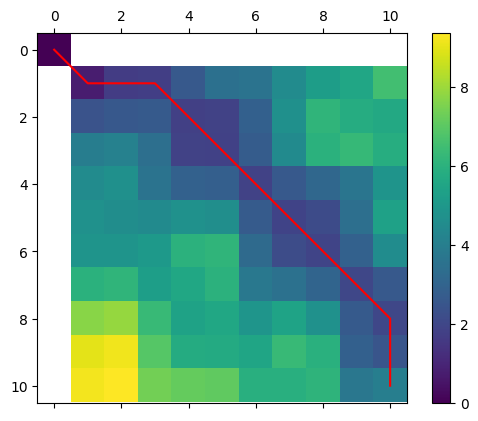

In [7]:
# Define a function to trace back the optimal path
def trace_back_path(dtw_matrix):
    """
    Function to trace back the optimal path in the DTW matrix
    """
    # Initialize the path with the end point
    path = [[len(dtw_matrix)-1, len(dtw_matrix[0])-1]]
    
    # Initialize i and j
    i = len(dtw_matrix) - 1
    j = len(dtw_matrix[0]) - 1
    
    # Loop until we reach the start point
    while i > 0 and j > 0:
        # Get the indices of the neighboring cells
        indices = [i-1, j-1, i-1, j, i, j-1]
        
        # Get the values of the neighboring cells
        values = [dtw_matrix[i-1][j-1], dtw_matrix[i-1][j], dtw_matrix[i][j-1]]
        
        # Get the index of the minimum value
        min_index = np.argmin(values)
        
        # Update i and j
        i = indices[2*min_index]
        j = indices[2*min_index+1]
        
        # Append the new point to the path
        path.append([i, j])
    
    # Reverse the path
    path = path[::-1]
    
    return path

# Trace back the optimal path
path = trace_back_path(dtw_matrix)

# Print the optimal path
print(f"The optimal path in the DTW matrix is: {path}")

# Visualize DTW Matrix and Optimal Path
def visualize_dtw_matrix_and_path(dtw_matrix, path):
    """
    Function to visualize the DTW matrix and the optimal path
    """
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()
    
    # Create a heatmap of the DTW matrix
    cax = ax.matshow(dtw_matrix, interpolation='nearest', cmap='viridis')
    
    # Create a colorbar
    fig.colorbar(cax)
    
    # Plot the optimal path
    path = np.array(path)
    ax.plot(path[:, 1], path[:, 0], 'r')
    
    # Show the plot
    plt.show()

# Visualize the DTW matrix and the optimal path
visualize_dtw_matrix_and_path(dtw_matrix, path)

## Implement k-Nearest Neighbors (k-NN) Classifier
Implement the k-NN classifier using the computed distances.

In [8]:
# Define the k-NN classifier
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    # Function to fit the model
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # Function to predict the class labels
    def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            distances = []
            for j in range(len(self.X_train)):
                # Compute the distance between the test instance and each training instance
                distance = compute_dtw_distance(X_test[i], self.X_train[j])
                distances.append((self.y_train[j], distance))
            # Sort the distances in ascending order
            distances.sort(key=lambda x: x[1])
            # Get the class labels of the k nearest neighbors
            neighbors = [distances[m][0] for m in range(self.k)]
            # Predict the class label by majority vote
            predictions.append(max(set(neighbors), key=neighbors.count))
        return predictions

### Generate synthetic classification dataset

Time series dataset for a univariate classification problem with distinct 
classes represented by different distribution processes

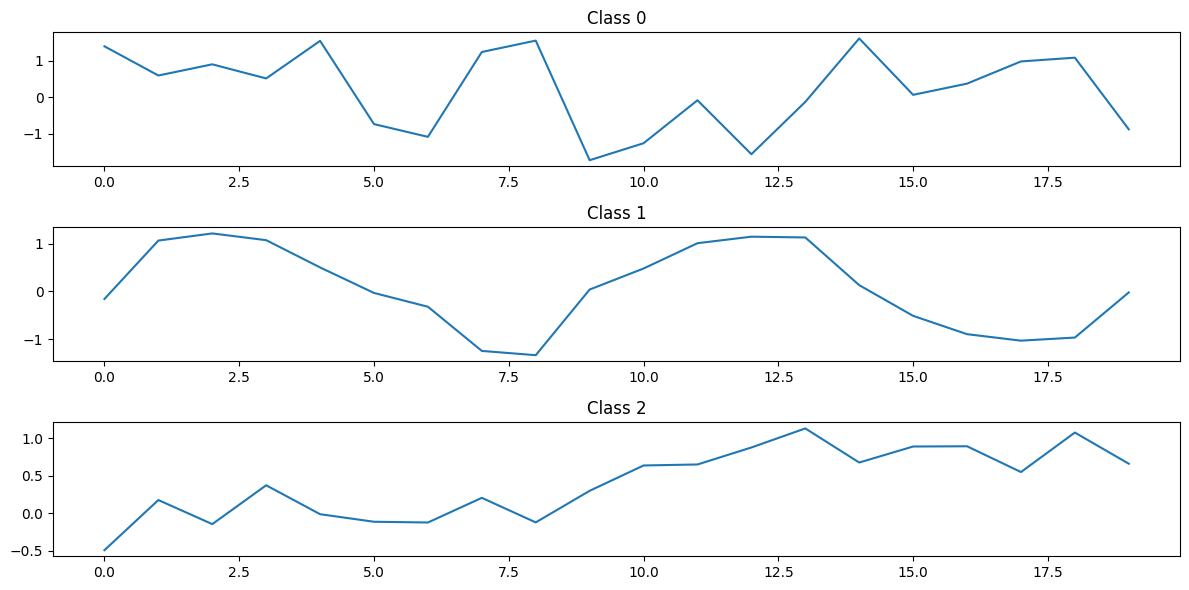

In [15]:
n_samples_per_class = 10
timesteps = 20

# Class 1: Normal distribution
class_1 = np.random.normal(loc=0, scale=1, size=(n_samples_per_class, timesteps))

# Class 2: Sinusoidal pattern with noise
time = np.linspace(0, 4*np.pi, timesteps)
class_2 = np.array([np.sin(time) + np.random.normal(scale=0.5, size=timesteps) for _ in range(n_samples_per_class)])

# Class 3: Linear trend with noise
class_3 = np.array([np.linspace(i, i + 1, timesteps) + np.random.normal(scale=0.2, size=timesteps) for i in range(n_samples_per_class)])

# Combine classes and labels
data = np.concatenate([class_1, class_2, class_3], axis=0)
labels = np.concatenate([np.zeros(n_samples_per_class), np.ones(n_samples_per_class), np.full(n_samples_per_class, 2)], axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Visualization
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(data[labels.flatten() == i][0])
    plt.title(f'Class {i}')
plt.tight_layout()
plt.show()

Now we test the KNN classifier on the synthetic dataset

In [16]:
# Create an instance of the k-NN classifier
knn = KNNClassifier(k=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.50      1.00      0.67         2
         2.0       1.00      1.00      1.00         2

    accuracy                           0.67         6
   macro avg       0.50      0.67      0.56         6
weighted avg       0.50      0.67      0.56         6

Accuracy:  0.6666666666666666


/home/victor/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victor/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victor/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluate Classifier Performance
Evaluate the performance of the classifier using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [17]:
# Importing the required libraries for performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Compute the precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)

# Compute the recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

Confusion Matrix:
 [[0 2 0]
 [0 2 0]
 [0 0 2]]
Accuracy:  0.6666666666666666
Precision:  0.5
Recall:  0.6666666666666666
F1 Score:  0.5555555555555555


/home/victor/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
